Copyright (c) 2023 Habana Labs, Ltd. an Intel Company.  
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


# Stable Diffusion Inference using Intel&reg; Gaudi&reg; AI Accelerator with PyTorch

In this notebook we will demonstrate how you can run inference on the Intel Gaudi Accelerator with the stable-diffusion text-to-image generation model using Pytorch.

## Run inference

We will clone Habana `Model-References` repository branch to this docker, let us cd to the appropriate directory where our text-to-image generation script and model resides.

In [1]:
%cd ~/Gaudi-tutorials/PyTorch/Single_card_tutorials
!git clone -b 1.15.1 https://github.com/habanaai/Model-References

/root/Gaudi-tutorials/PyTorch/Single_card_tutorials


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


fatal: destination path 'Model-References' already exists and is not an empty directory.


In [2]:
%cd Model-References/PyTorch/generative_models/stable-diffusion-v-2-1

/root/Gaudi-tutorials/PyTorch/Single_card_tutorials/Model-References/PyTorch/generative_models/stable-diffusion-v-2-1


Next, we need to install all the Python package dependencies.

In [ ]:
!pip install -q -r requirements.txt

Now we download the model checkpoint from Hugging Face.

In [ ]:
!wget https://huggingface.co/stabilityai/stable-diffusion-2-1-base/resolve/main/v2-1_512-ema-pruned.ckpt

Now we are ready for image generation. Enter a prompt by running the cell below.

In [4]:
prompt = input("Enter a prompt for image generation: ")

Enter a prompt for image generation:  hello happy face


Run the following cell to generate images from your text prompt.

In [5]:
cmd = f'python scripts/txt2img.py --prompt "{prompt}" --ckpt v2-1_512-ema-pruned.ckpt --config configs/stable-diffusion/v2-inference.yaml --H 512 --W 512 --n_samples 1 --n_iter 2 --steps 35 --k_sampler dpmpp_2m --use_hpu_graph'
print(cmd)
import os
os.system(cmd)

python scripts/txt2img.py --prompt "hello happy face" --ckpt v2-1_512-ema-pruned.ckpt --config configs/stable-diffusion/v2-inference.yaml --H 512 --W 512 --n_samples 1 --n_iter 2 --steps 35 --k_sampler dpmpp_2m --use_hpu_graph


Seed set to 42
============================= HABANA PT BRIDGE CONFIGURATION =========================== 
 PT_HPU_LAZY_MODE = 1
 PT_RECIPE_CACHE_PATH = 
 PT_CACHE_FOLDER_DELETE = 0
 PT_HPU_RECIPE_CACHE_CONFIG = 
 PT_HPU_MAX_COMPOUND_OP_SIZE = 9223372036854775807
 PT_HPU_LAZY_ACC_PAR_MODE = 1
 PT_HPU_ENABLE_REFINE_DYNAMIC_SHAPES = 0
---------------------------: System Configuration :---------------------------
Num CPU Cores : 160
CPU RAM       : 1056399524 KB
------------------------------------------------------------------------------


Loading model from v2-1_512-ema-pruned.ckpt
Global Step: 220000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 865.91 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Compiling HPU graph encode_with_transformer    
Compiling HPU graph encode_with_transformer     took   1.21 sec
Compiling HPU graph sampler_step               
Compiling HPU graph sampler_step                took   9.22 sec
Compiling HPU graph decode_first_stage         
Compiling HPU graph decode_first_stage          took  11.11 sec
Batch   0 took   28512.1 ms
Batch   1 took     601.4 ms
Batch   2 took     594.5 ms
Your samples are ready and waiting for you here: 
outputs/txt2img-samples 
 
Enjoy.
HPU memory usage: 2.9 GB / 94.6 GB (3%)


0

## View results
Run the below cell to view latest results.

outputs/txt2img-samples/grid-0002.png


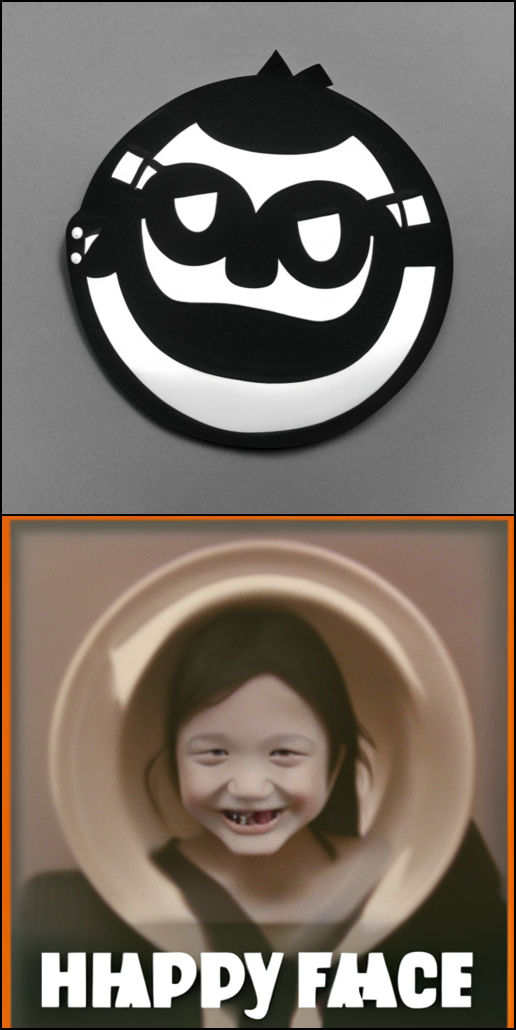

In [6]:
from PIL import Image
import os, glob
filename = max(glob.iglob('outputs/txt2img-samples/grid-*.png'), key=os.path.getmtime)
print(filename)
image = Image.open(filename)
image.show()

In [7]:
exit()